In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind

train_df = pd.read_csv('application_train.csv')
test_df = pd.read_csv('application_test.csv')

#we have days_employed as negative data
train_df['DAYS_EMPLOYED'] = [i*-1 for i in train_df['DAYS_EMPLOYED']]
train_df['DAYS_BIRTH'] = [i*-1 for i in train_df['DAYS_BIRTH']]

application = train_df.copy()

In [149]:
#for memory efficient we are converting data types from int 64 to int 32 #this function will convert entire dataset
def convert_dataframe_astype(dataset):
    column_int=[]
    column_float =[]
    for lst in dataset.columns:
        if dataset[lst].dtype ==int:
            column_int.append(lst)
        elif train_df[lst].dtype ==float:
            column_float.append(lst)
    dataset[column_int] = dataset[column_int].astype('int32')
    dataset[column_float] = dataset[column_float].astype('float32')
    return dataset

In [150]:
train_df = convert_dataframe_astype(train_df)
train_df = train_df.drop_duplicates(keep='first')
print(train_df.shape)
print(train_df.dtypes)

(307511, 122)
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float32
AMT_REQ_CREDIT_BUREAU_WEEK    float32
AMT_REQ_CREDIT_BUREAU_MON     float32
AMT_REQ_CREDIT_BUREAU_QRT     float32
AMT_REQ_CREDIT_BUREAU_YEAR    float32
Length: 122, dtype: object


In [151]:
def check_missing_percentage(dataframe):
    missing_values = dataframe.isnull().sum() / len(dataframe) *100
    return missing_values.sort_values(ascending = False)

In [152]:
#Let's see missing values
missing_values = train_df.isnull().sum() / len(train_df) *100
missing_values.sort_values(ascending = False).head()

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
dtype: float64

# Summary Statistics

In [6]:
# Looks like about 65% of applicants are Female and 35% of applicants are Male. 
stat = train_df.CODE_GENDER.value_counts() / len(train_df)
stat.head()

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [7]:
stat = train_df.OCCUPATION_TYPE.value_counts() / len(train_df)
stat.head()

Laborers       0.179460
Sales staff    0.104393
Core staff     0.089655
Managers       0.069497
Drivers        0.060495
Name: OCCUPATION_TYPE, dtype: float64

In [8]:
stat = train_df.FLAG_OWN_CAR.value_counts() / len(train_df)
stat

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

In [9]:
stat = train_df.FLAG_OWN_REALTY.value_counts() / len(train_df)
stat

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

In [10]:
stat = train_df.NAME_EDUCATION_TYPE.value_counts() / len(train_df)
stat

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [11]:
stat =  train_df.groupby('TARGET')
stat.mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,
0,278244.744536,0.412946,169077.718750,602648.3125,27163.623047,542736.81250,0.021021,16138.176397,-65696.146123,-5029.940918,...,0.008341,0.000605,0.000506,0.000315,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
1,277449.167936,0.463807,165611.765625,557778.5000,26481.744141,488972.40625,0.019131,14884.828077,-42394.675448,-4487.126953,...,0.005720,0.000483,0.000524,0.000564,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783


In [12]:
#number  types of  categorial data 
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [13]:
gender = train_df['CODE_GENDER']
print(gender.value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


In [14]:
train_df.drop(train_df[train_df['CODE_GENDER'] =='XNA'].index, inplace = True) 
gender = train_df['CODE_GENDER']
print(gender.value_counts())

F    202448
M    105059
Name: CODE_GENDER, dtype: int64


In [153]:
# Preprocessing for Filling missing values

label = train_df.iloc[:,1].values
column_obj =[]
column_num =[]# column_num we are going to refer thorughindex of coulmn names
for lst in train_df.columns:
    if train_df[lst].dtype ==object:
        index = train_df.columns.get_loc(lst)
        column_obj.append(lst)
    else:
        index = train_df.columns.get_loc(lst)
        if(index !=0 and index !=1):
             column_num.append(index)
#number of missing values in categoral data
objtype_null =train_df[column_obj].isnull().sum()


In [154]:
#filling missing value for categoral data
train_df[column_obj] = train_df[column_obj].fillna(train_df.mode().iloc[0],axis =0)

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train_df.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        test_df[col] = le.fit_transform(test_df[col].astype(str))
        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))

Label encoded 5 columns.


In [156]:
# one-hot encode of categorical variables
train_df = pd.get_dummies(train_df,drop_first=True)
test_df = pd.get_dummies(test_df,drop_first=True)


Visualize the data

In [17]:
temp = train_df["TARGET"].value_counts()
df = [go.Bar(x=temp.index,
            y=temp.values)]
py.iplot(df)

In [18]:
def bar_chart(feature):
    Loan_repayed = train_df[train_df['TARGET']==0][feature].value_counts()
    Loan_deafulters = train_df[train_df['TARGET']==1][feature].value_counts()
    df = pd.DataFrame([Loan_repayed,Loan_deafulters])
    df.index = ['Loan_repayed','Loan_deafulters']
    df.plot(kind ='bar',figsize=(16,10))

In [19]:
def box_plot(feature):
    sns.boxplot(x= train_df[feature])
    plt.show()

In [20]:
def heat_map(feature):
    df = pd.DataFrame(feature)
    plt.figure(figsize =(10,10))
    sns.heatmap(df.corr(),annot=True,center=0,robust=True)
    plt.show()   

In [21]:
#this function used to split the list by length 10 for num =1 it will return [1-10] and for num =2 it return [11-20]
def get_list(dataset,column_list,num):
    end  = num*10
    start = end-10 
    if(len(dataset.columns) > start):
        listofcolumns = column_list[start:end]
        listofcolumns.append(1)
        return listofcolumns
    else:
        listofcolumns = column_list[start:]
        listofcolumns.append(1)
        return listofcolumns

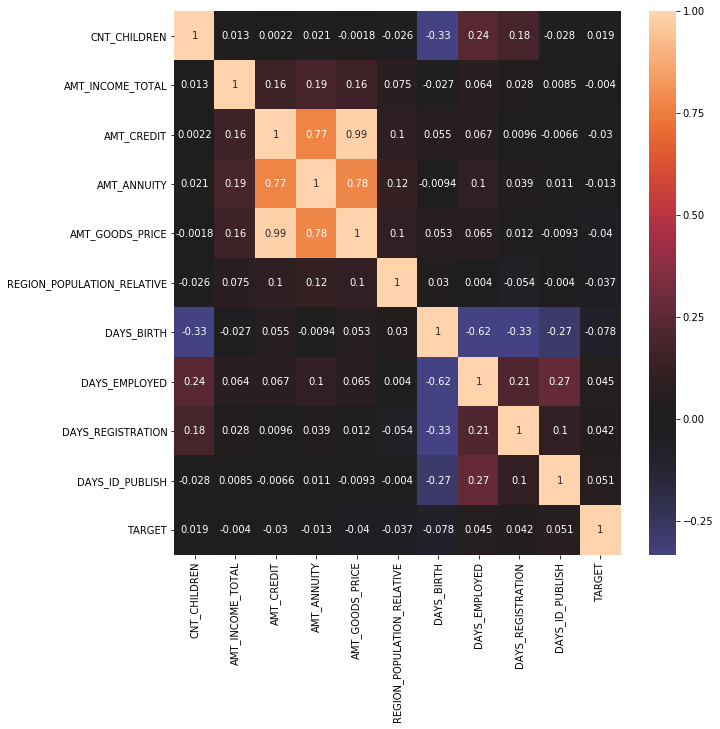

In [22]:
#use get_list for spliting list for better visuvalization
heat_map(train_df.iloc[:,get_list(train_df,column_num,1)])

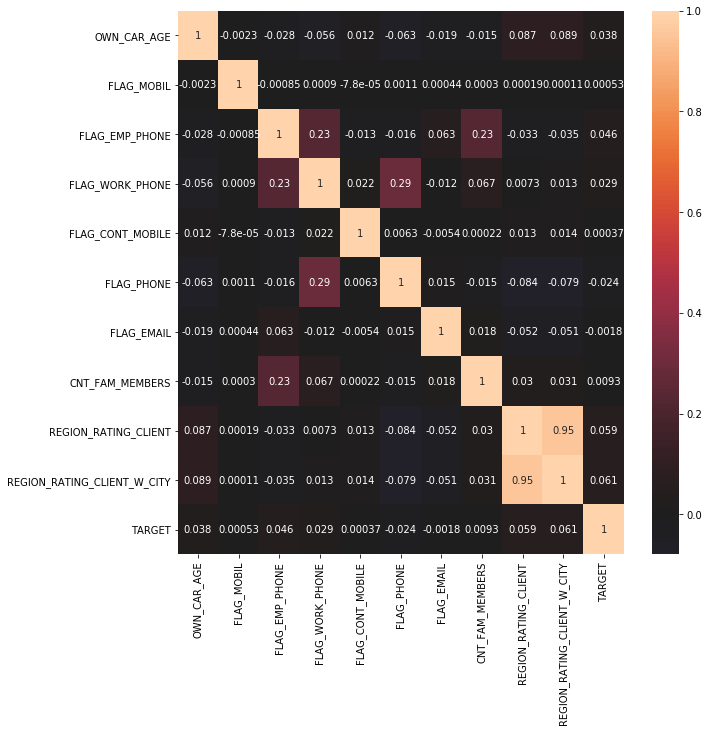

In [23]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,2)])

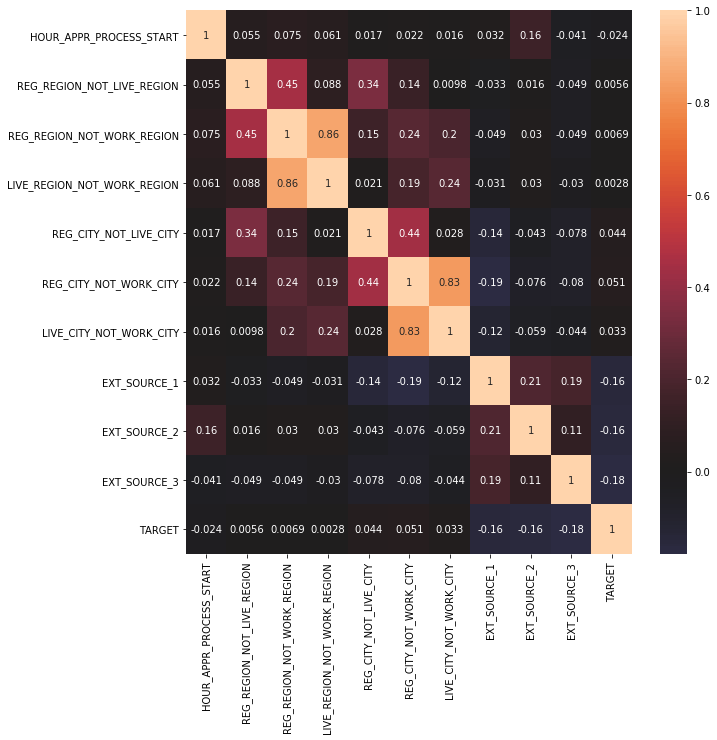

In [24]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,3)])

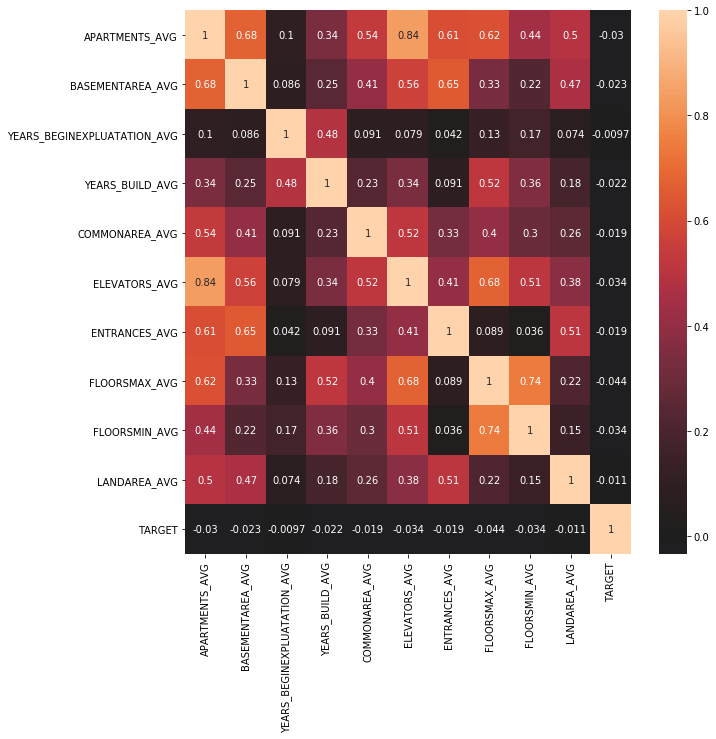

In [25]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,4)])

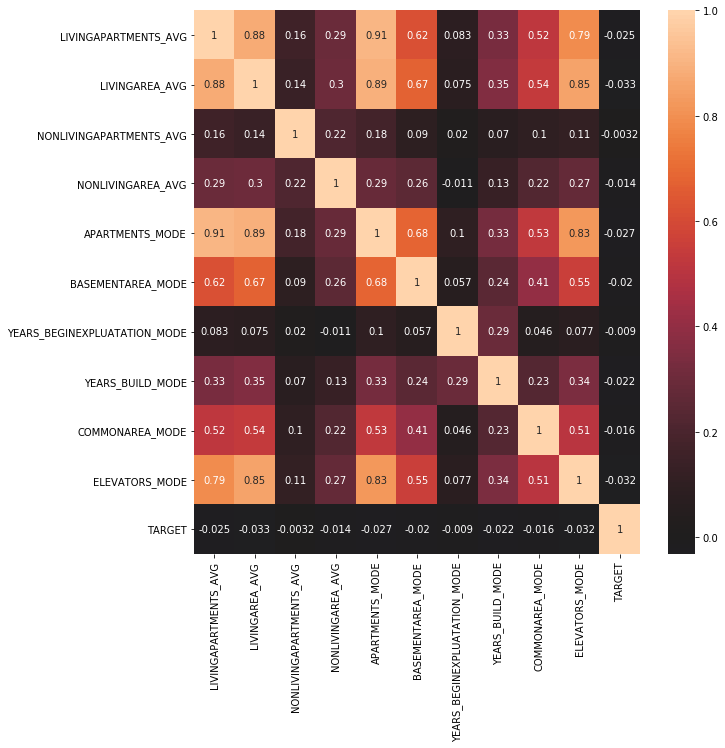

In [26]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,5)])

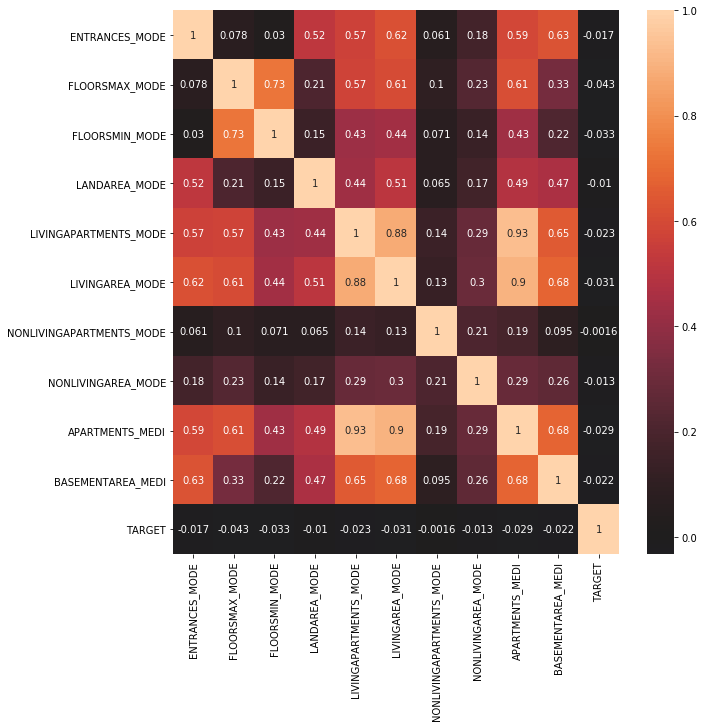

In [27]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,6)])

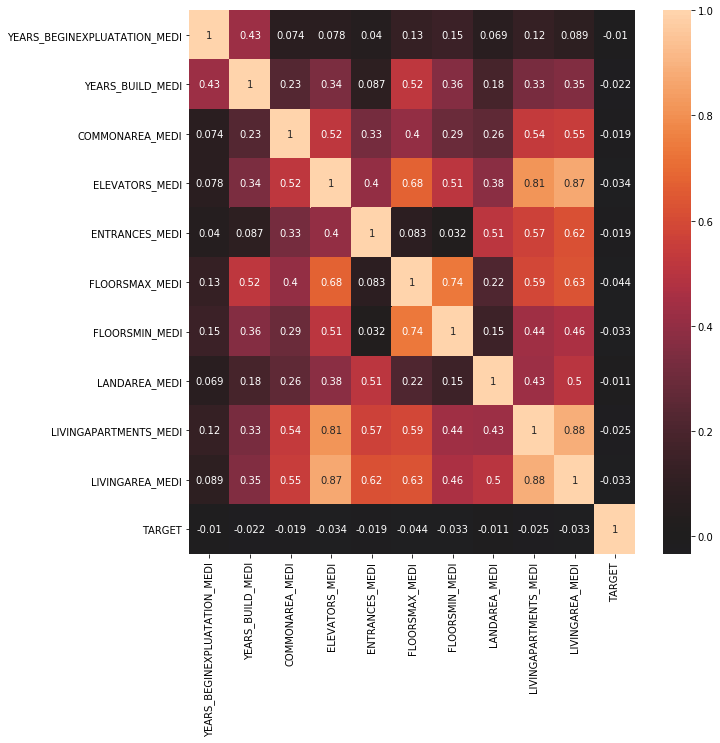

In [28]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,7)])

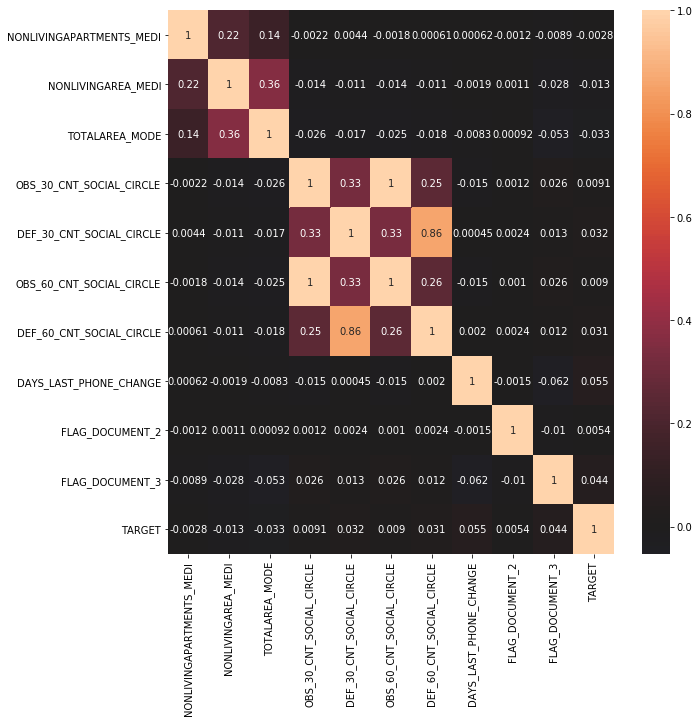

In [29]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,8)])

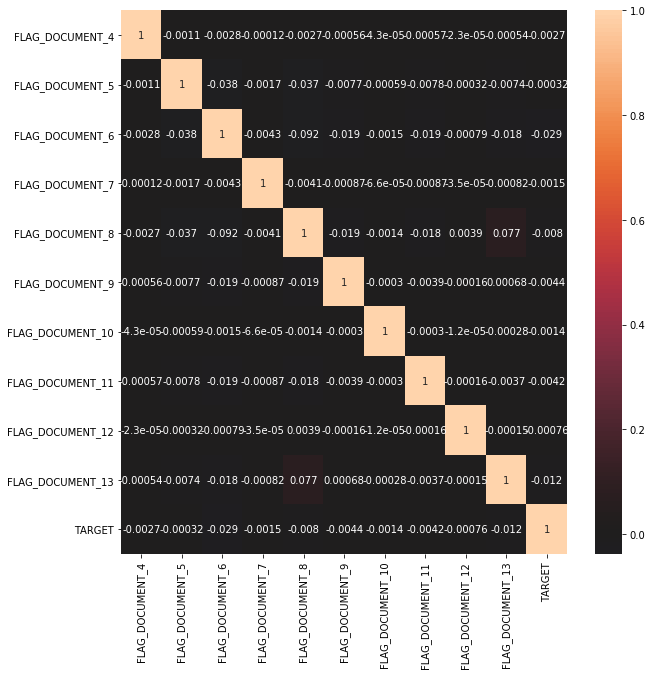

In [30]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,9)])

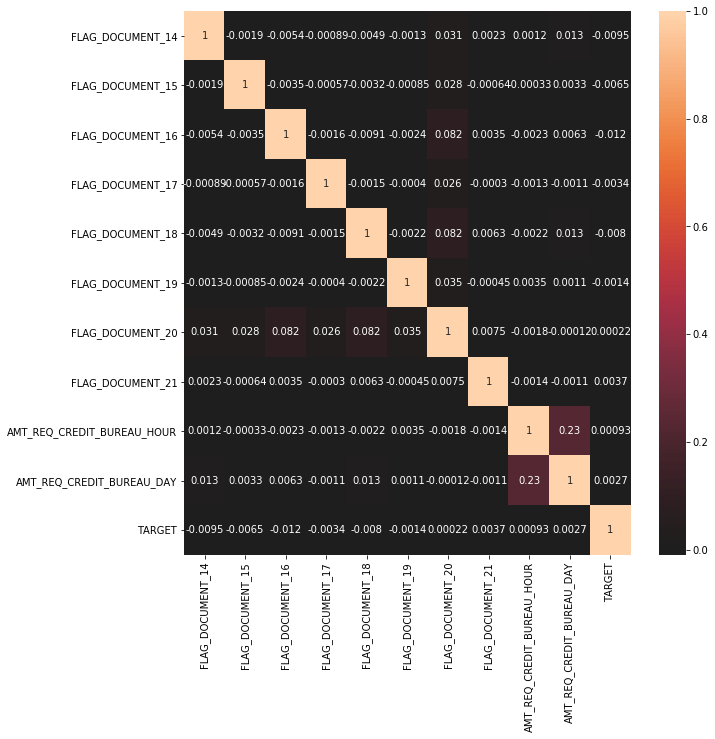

In [31]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,10)])

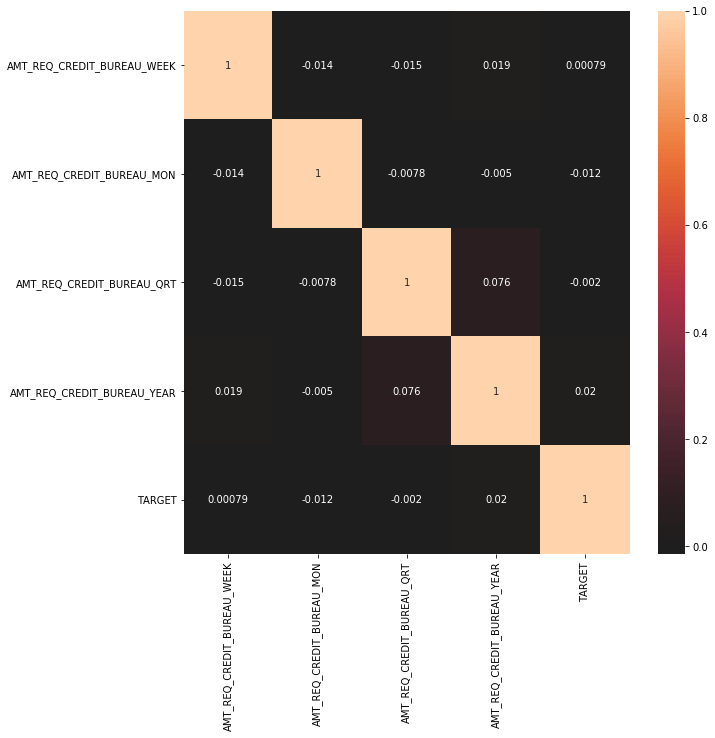

In [32]:
heat_map(train_df.iloc[:,get_list(train_df,column_num,11)])

In [33]:
#finding corealtion with target variable
cor_target = train_df.corr()['TARGET'].sort_values(ascending=False)
print('Positive Correlations\n', cor_target.tail(20))
print('Negative Correlations:\n', cor_target.head(20))

Positive Correlations
 AMT_CREDIT                   -0.030371
LIVINGAREA_MODE              -0.030688
ELEVATORS_MODE               -0.032135
TOTALAREA_MODE               -0.032599
FLOORSMIN_MODE               -0.032703
LIVINGAREA_MEDI              -0.032743
LIVINGAREA_AVG               -0.033001
FLOORSMIN_MEDI               -0.033400
FLOORSMIN_AVG                -0.033619
ELEVATORS_MEDI               -0.033866
ELEVATORS_AVG                -0.034202
REGION_POPULATION_RELATIVE   -0.037225
AMT_GOODS_PRICE              -0.039647
FLOORSMAX_MODE               -0.043231
FLOORSMAX_MEDI               -0.043773
FLOORSMAX_AVG                -0.044009
DAYS_BIRTH                   -0.078242
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_3                 -0.178926
Name: TARGET, dtype: float64
Negative Correlations:
 TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE  

In [34]:
def pie_chart(feature):
    testOne= train_df[train_df.TARGET==1]
    testZero= train_df[train_df.TARGET==0]
    pieOne = testOne[feature].value_counts()
    pieZero = testZero[feature].value_counts()
    labelsOne = pieOne.index
    valuesOne = pieOne.values
    labelsZero = pieZero.index
    valuesZero = pieZero.values
    fig = make_subplots(rows=1, cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=labelsOne, values=valuesOne,
                   textfont=dict(size=12)),1,1)

    fig.add_trace(go.Pie(labels=labelsZero, values=valuesZero,
                   textfont=dict(size=12)),1,2)
    fig.update_layout(
    title_text=feature,
    annotations=[dict(text='Loan Deafulters', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Loan Repaid', x=0.82, y=0.5, font_size=20, showarrow=False)])
    fig.show()

In [35]:
def bar_chartAndLinechart(feature):
        data = train_df[train_df.TARGET==1]
        loanDefaulters = data[feature].value_counts()
        totalApplicants = train_df[feature].value_counts()
        loanIndex = loanDefaulters.index
        loanValues = loanDefaulters.values
        totalIndex = totalApplicants.index
        totalValues = totalApplicants.values
        percentOfValues = np.true_divide(loanValues, totalValues)

        sns.set(style="white", rc={"lines.linewidth": 3})
        fig, ax1 = plt.subplots(figsize=(7,7))
        plt.xticks(rotation=90)
        plt.tight_layout()
        ax2 = ax1.twinx()
        sns.barplot(x=totalIndex,
                    y=totalValues, 
                    color='#004488',
                    ax=ax1)
        sns.lineplot(x=totalIndex, 
                     y=np.round(percentOfValues,decimals = 3),
                     color='r',
                     marker="o",label = 'Percent of Defaulters',
                     ax=ax2)

        plt.show()
        sns.set()    

In [36]:
def ibar_plot(feature):
    data = train_df[train_df.TARGET==1]
    loanDefaulters = data[feature].value_counts()
    totalApplicants = train_df[feature].value_counts()
    loanIndex = loanDefaulters.index
    loanValues = loanDefaulters.values
    totalIndex = totalApplicants.index
    totalValues = totalApplicants.values
    index=[]
    percentOfValues=[]
    if len(totalIndex) == len(loanIndex):
        percentOfValues = np.true_divide(loanValues, totalValues)
    else:
        for i,j in zip(loanIndex, loanValues):
            for k,l in zip(totalIndex, totalValues):
                if(i==k):
                    percentOfValues.append(j/l)
                    index.append(i)
                else:
                    if k not in loanIndex and k not in index:
                        index.append(k)
                        if len(percentOfValues) <= len(totalIndex):
                            percentOfValues.append(0) 
    
    
    color1 = '#00bfff'
    color2 = '#ff4000'

    trace1 = go.Bar(
        x = totalIndex,
        y = totalValues,
        marker=dict(
            color=color1
        )

    )
    if(len(index)>0):
        value = index
    else:
        value = totalIndex
        
    trace2 = go.Scatter(
        x=value,
        y = np.round(percentOfValues,decimals = 3),
        yaxis='y2'

    )
    data = [trace1, trace2]
    layout = go.Layout(
        title= (feature),
        titlefont=dict(
        family='Courier New, monospace',
        size=15,
        color='#7f7f7f'
        ),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',

        yaxis=dict(
            titlefont=dict(
                color=color1
            ),
            tickfont=dict(
                color=color1
            )
        ),
        yaxis2=dict(
            overlaying='y',
            side='right',
            titlefont=dict(
                color=color2
            ),
            tickfont=dict(
                color=color2
            )

        )

    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.plot(fig)

In [37]:
ibar_plot('OCCUPATION_TYPE')

#lets see what type of occuaption  loan applicant are doing

In [38]:
ibar_plot('REG_CITY_NOT_WORK_CITY')

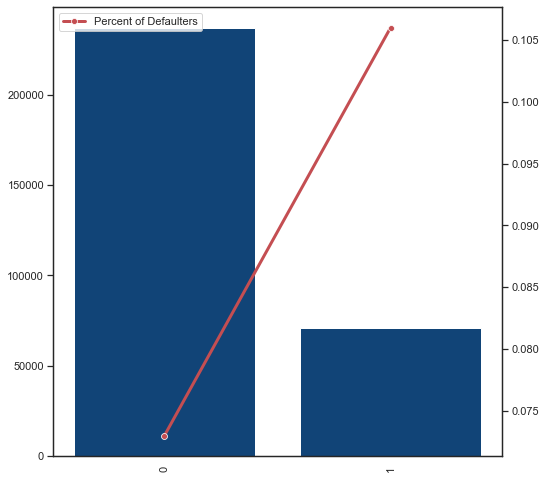

In [39]:
bar_chartAndLinechart('REG_CITY_NOT_WORK_CITY')

People who worked lived in city worked in other are the one who is not repaying loan.

In [40]:
ibar_plot('REGION_RATING_CLIENT_W_CITY')

In [41]:
ibar_plot('CODE_GENDER')

# Male gender are the one who is not repaying most likely.

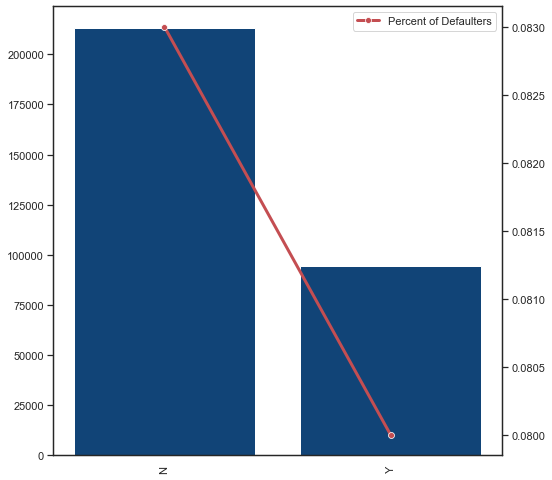

In [42]:
bar_chartAndLinechart('FLAG_OWN_REALTY')

Most  loan applicant are owning real estate as well as they are the one who are not repaying.

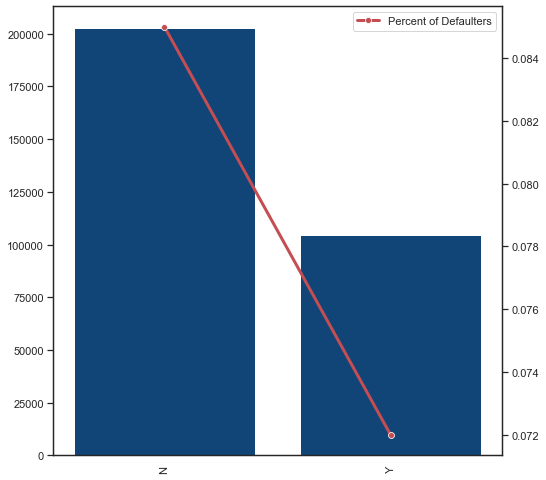

In [43]:
bar_chartAndLinechart('FLAG_OWN_CAR')

people who own a car are repaying loan.

In [44]:
income = train_df['NAME_INCOME_TYPE']
income.value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [45]:
ibar_plot('NAME_INCOME_TYPE')

As we can see more loan applicant are from working class as well as this working class customers are not repaying loans


In [46]:
ibar_plot('NAME_TYPE_SUITE')

In [47]:
pie_chart('NAME_EDUCATION_TYPE')

we can clear see that most loan applicant are secondary education

In [48]:
pie_chart('NAME_HOUSING_TYPE')

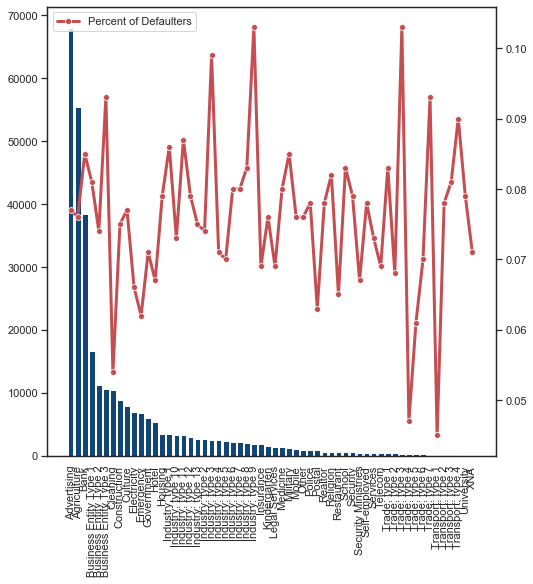

In [49]:
bar_chartAndLinechart('ORGANIZATION_TYPE')

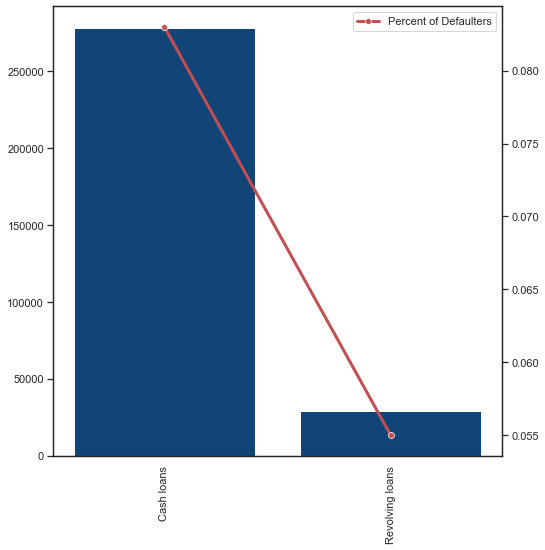

In [50]:
bar_chartAndLinechart('NAME_CONTRACT_TYPE')

Overall 90 % of loans are cash

In [51]:
def distribution_plot(feature,dataset):
    plt.figure(figsize=(12,5))
    plt.title("Distribution of "+feature)
    ax = sns.distplot(train_df[feature].dropna())

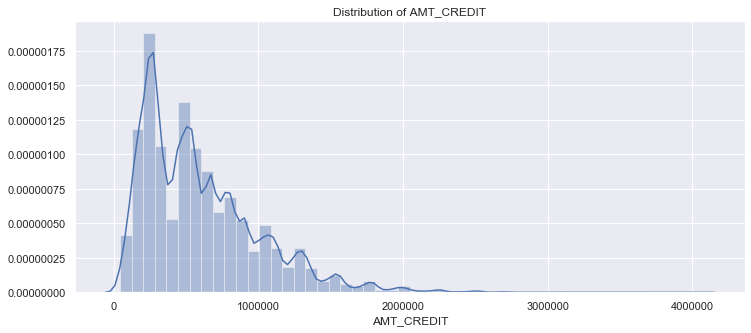

In [52]:
distribution_plot('AMT_CREDIT',train_df)

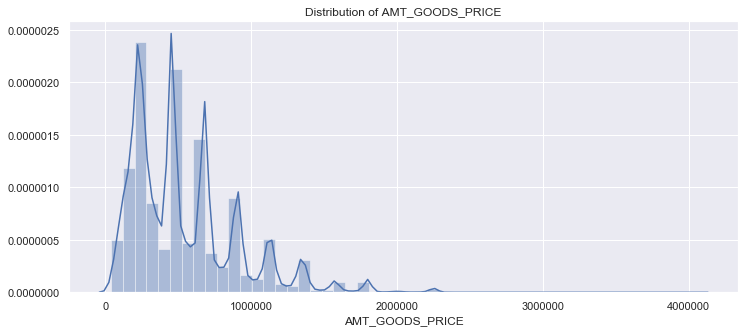

In [53]:
distribution_plot('AMT_GOODS_PRICE',train_df)

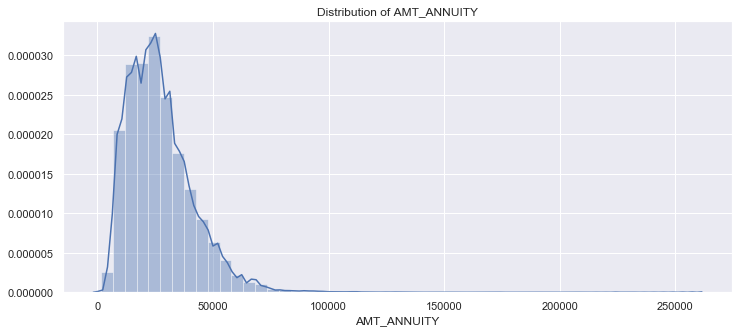

In [54]:
distribution_plot('AMT_ANNUITY',train_df)

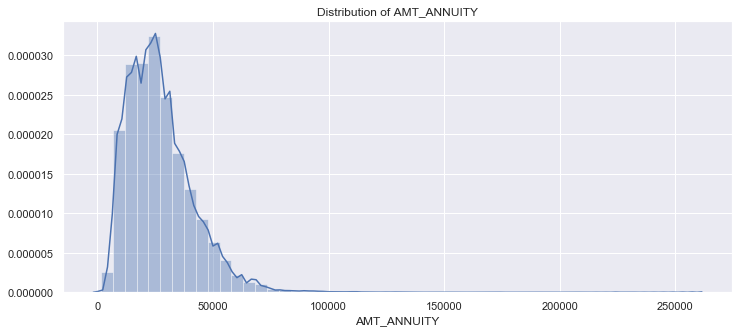

In [55]:
distribution_plot('AMT_ANNUITY',train_df)

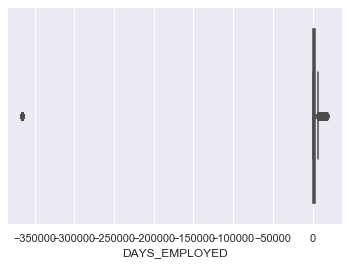

In [56]:
box_plot('DAYS_EMPLOYED')

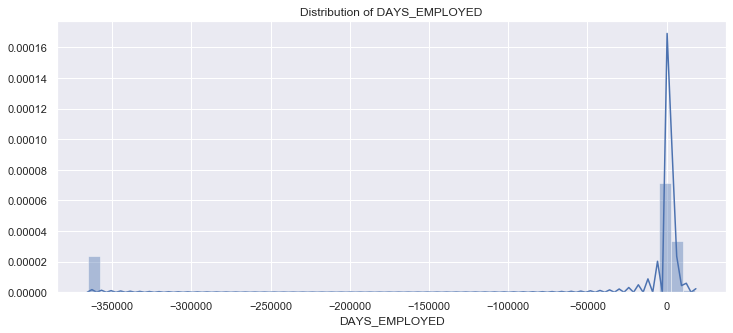

In [57]:
distribution_plot('DAYS_EMPLOYED',train_df)

In [58]:
from scipy import stats 
# Interquartile range (IQR) 
IQR = stats.iqr(train_df['DAYS_EMPLOYED'], interpolation = 'midpoint')
print(IQR)

2471.0


In [59]:
anomalies = train_df[train_df['DAYS_EMPLOYED'] == -365243]
non_anomalies = train_df[train_df['DAYS_EMPLOYED'] != -365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anomalies['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalies['TARGET'].mean()))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans


In [198]:
#as we can see outlier we need drop the column as it effects the results drop the data for trian and test dataframe
train_df.drop(train_df[train_df['DAYS_EMPLOYED'] == -365243].index, inplace = True) 
test_df.drop(test_df[test_df['DAYS_EMPLOYED']== -365243].index, inplace = True) 

Skewness: 1.968316
Kurtosis: 4.752652


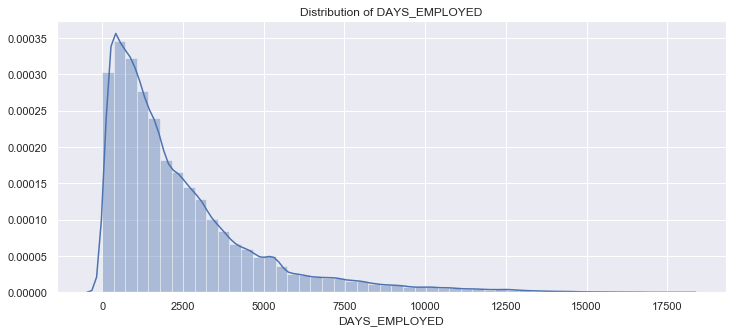

In [199]:
distribution_plot('DAYS_EMPLOYED',train_df)
print("Skewness: %f" % train_df['DAYS_EMPLOYED'].skew())
print("Kurtosis: %f" % train_df['DAYS_EMPLOYED'].kurt())

In [62]:
sampleTargetOne= train_df[train_df.TARGET ==1]
sampleTargetTwo = train_df[train_df.TARGET ==0]

In [63]:
def permutation_sample(data1, data2):
        data = np.random.permutation(np.concatenate((data1, data2)) )
        perm_sample_1 = data[:len(data1)]
        perm_sample_2 = data[len(data1):]
        return perm_sample_1, perm_sample_2
    
def hypothesis_testing(sampleDataOne,sampleDataTwo,N_rep):
    mean_diff_observed = np.mean(sampleDataOne) - np.mean(sampleDataTwo)
    np.random.seed(47)
    perm_mean = np.empty(N_rep)
    for i in range(N_rep):
        perm_TargetOne,perm_TargetZero = permutation_sample(sampleDataOne, sampleDataTwo)
        perm_mean[i] = np.mean(perm_TargetOne) - np.mean(perm_TargetZero)

    p_value = np.sum(perm_mean >= mean_diff_observed)/len(perm_mean)
    print(p_value)
    if p_value <0.05:
      return "we reject null hypothesis"
    else:
      return "we cannot reject null hypothesis"

In [64]:
#let us divide the data into two categories First(people age between :20-35 years) Second(people age between(35-60+ years))
#40 years = 35*365 =12775 days
sampleOne = sampleTargetTwo.DAYS_BIRTH[sampleTargetTwo['DAYS_BIRTH'] < 12775]
sampleTwo = sampleTargetTwo.DAYS_BIRTH[sampleTargetTwo['DAYS_BIRTH'] >= 12775]
#Null Hypothesis: Everyage age group people are repaying equally
hypothesis_testing(sampleOne,sampleTwo,1000)

1.0


'we cannot reject null hypothesis'

Null Hypothesis: The average repay Ratio is the same for young age and above mid level age

In [65]:
# creating dataframes for each of the groups

low = train_df[(train_df['DAYS_BIRTH'] < 10950)]
high = train_df[(train_df['DAYS_BIRTH'] >= 14600)]
mid = train_df[(train_df['DAYS_BIRTH'] < 14600) & (train_df['DAYS_BIRTH'] > 10950)]

lowd = sorted(low['DAYS_BIRTH'])
highd = sorted(high['DAYS_BIRTH'])
midd = sorted(mid['DAYS_BIRTH'])

#ANOVA test
f_statistic, p_value = stats.f_oneway(lowd, highd, midd)
print('f value :', f_statistic)
print('p value :', p_value)

f value : 454031.59051254945
p value : 0.0


In [66]:
corr = stats.pearsonr(train_df['DAYS_BIRTH'],train_df['DAYS_EMPLOYED'])
corr

(0.3523108356440159, 0.0)

In [67]:
print(train_df['DAYS_BIRTH'].corr(train_df['TARGET']))
#we found good corelation let analyse at full extent

age_data = train_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS'] = age_data['DAYS_BIRTH'] / 365

minv = min(age_data['YEARS'])
maxv = max(age_data['YEARS'])

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS'], bins = np.linspace(int(minv), int(maxv), num =11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()

-0.06575791996756285


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



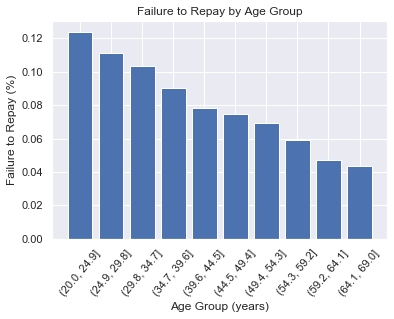

In [68]:
plt.bar(age_groups.index.astype(str), age_groups['TARGET'])
plt.xticks(rotation = 50); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Young people are mostly like not repaying money

so far we can see that 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET' this columns are usefull

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



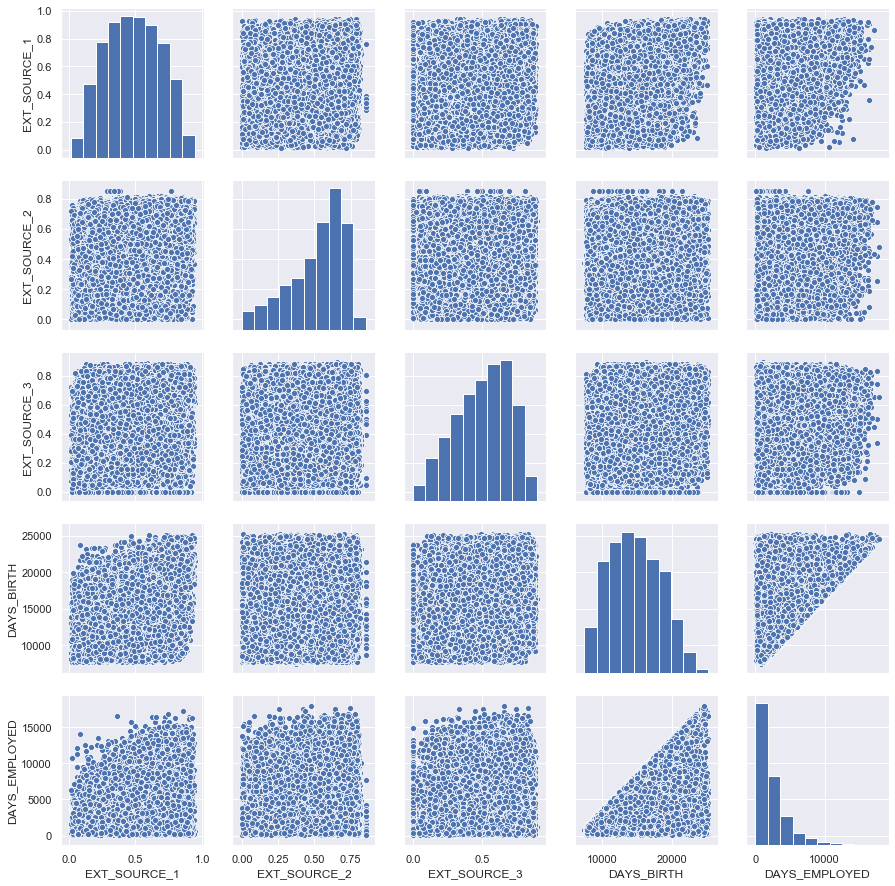

In [69]:
sns.set()
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

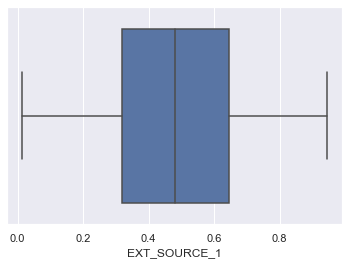

In [70]:
box_plot('EXT_SOURCE_1')

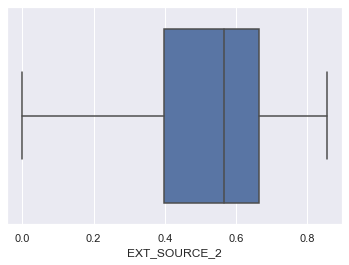

In [71]:
box_plot('EXT_SOURCE_2')

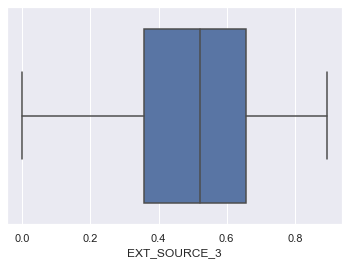

In [72]:
box_plot('EXT_SOURCE_3')

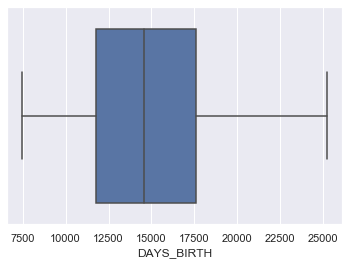

In [73]:
box_plot('DAYS_BIRTH')

In [214]:
col_less_imp =['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
                   'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                   'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                   'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
                   'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
                   'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
                   'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
                   'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                   'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE',
                   'EMERGENCYSTATE_MODE','NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity leave']

train_df.drop(col_less_imp,inplace=True,axis=1)


In [188]:
test_df.drop(col_less_imp,inplace=True,axis=1)

Feature Engineering

In [118]:
"""train_df['AMT_INCOME_TOTAL'] = np.log1p(train_df['AMT_INCOME_TOTAL'])
train_df['AMT_CREDIT'] = np.log1p(train_df['AMT_CREDIT'])
train_df['AMT_CREDIT / AMT_ANNUITY'] = train_df['AMT_CREDIT'] / train_df['AMT_ANNUITY']
train_df['EXT_SOURCE mean'] = train_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
train_df['EXT_SOURCE_1 / DAYS_BIRTH'] = train_df['EXT_SOURCE_1'] / train_df['DAYS_BIRTH']
train_df['AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = train_df['AMT_INCOME_TOTAL'] / 12. - train_df['AMT_ANNUITY']
train_df['AMT_INCOME_TOTAL / AMT_ANNUITY'] = train_df['AMT_INCOME_TOTAL'] / train_df['AMT_ANNUITY']
train_df['AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = train_df['AMT_INCOME_TOTAL'] - train_df['AMT_GOODS_PRICE']


test_df['AMT_INCOME_TOTAL'] = np.log1p(test_df['AMT_INCOME_TOTAL'])
test_df['AMT_CREDIT'] = np.log1p(test_df['AMT_CREDIT'])
test_df['AMT_CREDIT / AMT_ANNUITY'] = test_df['AMT_CREDIT'] / test_df['AMT_ANNUITY']
test_df['EXT_SOURCE mean'] = test_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
test_df['EXT_SOURCE_1 / DAYS_BIRTH'] = test_df['EXT_SOURCE_1'] / test_df['DAYS_BIRTH']
test_df['AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = test_df['AMT_INCOME_TOTAL'] / 12. - test_df['AMT_ANNUITY']
test_df['AMT_INCOME_TOTAL / AMT_ANNUITY'] = test_df['AMT_INCOME_TOTAL'] / test_df['AMT_ANNUITY']
test_df['AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = test_df['AMT_INCOME_TOTAL'] - test_df['AMT_GOODS_PRICE']"""

In [121]:
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']

In [124]:
from sklearn.preprocessing import MinMaxScaler, Imputer

imputer = Imputer(missing_values='NaN', strategy='median')
train_df[cols] = imputer.fit_transform(train_df[cols])
test_df[cols] = imputer.transform(test_df[cols])

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=4)
poly_interaction_train = poly_feat.fit_transform(train_df[cols])
poly_interaction_test = poly_feat.fit_transform(test_df[cols])

In [129]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(cols))
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(cols))
print(poly_interaction_train.shape)
print(poly_interaction_test.shape)


(252133, 70)
(48744, 70)


In [131]:
poly_interaction_train['TARGET'] = train_df['TARGET']
interaction = poly_interaction_train.corr()['TARGET'].sort_values()
interaction.head(15)

EXT_SOURCE_2 EXT_SOURCE_3                  -0.002282
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3     -0.002212
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3^2   -0.002001
EXT_SOURCE_1 EXT_SOURCE_3                  -0.001948
EXT_SOURCE_2 EXT_SOURCE_3^2                -0.001892
EXT_SOURCE_1 EXT_SOURCE_3^2                -0.001801
EXT_SOURCE_2^2 EXT_SOURCE_3                -0.001784
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH       -0.001784
EXT_SOURCE_1 EXT_SOURCE_2^2 EXT_SOURCE_3   -0.001729
EXT_SOURCE_1^2 EXT_SOURCE_3                -0.001626
EXT_SOURCE_1^2 EXT_SOURCE_2 EXT_SOURCE_3   -0.001602
EXT_SOURCE_1^2 EXT_SOURCE_3^2              -0.001592
EXT_SOURCE_2 EXT_SOURCE_3^2 DAYS_BIRTH     -0.001591
EXT_SOURCE_3                               -0.001583
EXT_SOURCE_2^2 EXT_SOURCE_3^2              -0.001575
Name: TARGET, dtype: float64

In [215]:
train = train_df.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH','TARGET', 'EXT_SOURCE_1'],axis=1))
test = test_df.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH', 'EXT_SOURCE_1'],axis=1))


1) debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL
2) annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL
3) annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT
4) days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH

In [216]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

In [217]:
train.shape

(252137, 253)

In [218]:
test.shape

(48744, 252)

In [219]:
assume_unique=False
ans = np.setdiff1d(train.columns,test.columns,assume_unique).tolist()
print(ans)

['TARGET']


In [220]:
from sklearn.preprocessing import MinMaxScaler, Imputer
features = list(set(train.columns).difference({'TARGET'}))
imputer = Imputer(strategy="median")
scaler = MinMaxScaler(feature_range = (0, 1))
imputer.fit(train.drop(['TARGET'],axis=1))
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))
test_transformed = imputer.transform(test)
train_transformed = scaler.fit_transform(train_transformed)
test_transformed = scaler.transform(test_transformed)


E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [221]:
X_train, X_test, y_train, y_test = train_test_split(train_transformed, train['TARGET'], test_size=0.25, random_state=42)

In [223]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

random_forest.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [224]:
random_forest_pred = random_forest.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_test,random_forest_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,random_forest_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,random_forest_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    6.7s finished


The accuracy in general is :  0.9139684302371698


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     57610
           1       1.00      0.00      0.00      5425

    accuracy                           0.91     63035
   macro avg       0.96      0.50      0.48     63035
weighted avg       0.92      0.91      0.87     63035

ROC AUC score is:  0.500184331797235


In [225]:
random_forest_pred_test = random_forest.predict_proba(test_transformed)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.7s finished


In [226]:
submission_random_forest = test[['SK_ID_CURR']]
submission_random_forest['TARGET'] = random_forest_pred_test[:,1]

submission_random_forest.to_csv("random_forest.csv",index=False)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)
xgb_classifier.fit(X_train,y_train)



In [229]:
xgb_pred = xgb_classifier.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_test,xgb_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,xgb_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,xgb_pred))

The accuracy in general is :  0.914333306892996


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     57610
           1       0.54      0.03      0.05      5425

    accuracy                           0.91     63035
   macro avg       0.73      0.51      0.50     63035
weighted avg       0.88      0.91      0.88     63035

ROC AUC score is:  0.5129904642451187


In [230]:
xgb_pred_test = xgb_classifier.predict_proba(test_transformed)
submission_xgb = test[['SK_ID_CURR']]
submission_xgb['TARGET'] = xgb_pred_test[:,1]
submission_xgb.to_csv("xgb.csv",index=False)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [231]:
xgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':xgb_classifier.feature_importances_})

In [233]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

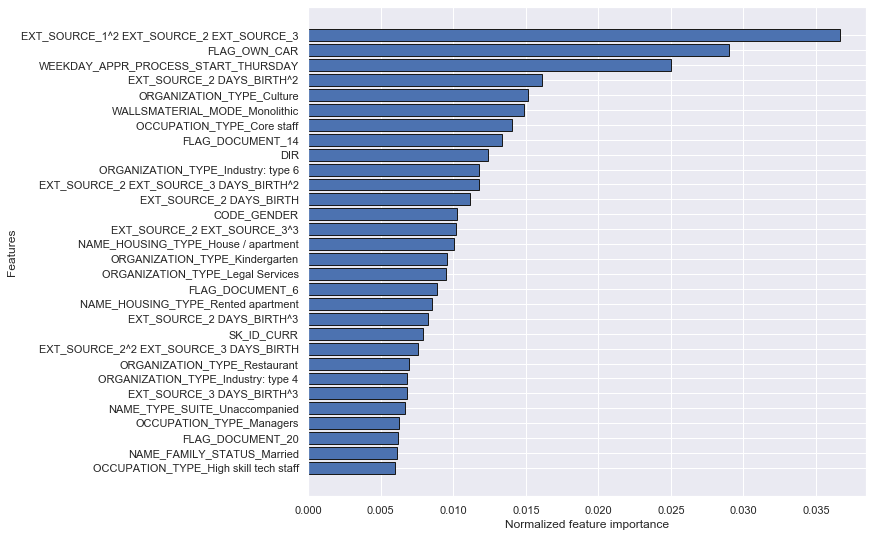

In [234]:
sorted_importance = plot_importance(xgb_feature_importance_df)
